# Task 2 - Diffusion Maps

In [9]:
from diffusion_maps import DiffusionMaps
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.datasets import make_swiss_roll

from pca import PCA
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1st - Similarity between Diffusion Maps and Fourier analysis

$$ X = x_k \in \mathbb{R}^2, x_k = (\cos(t_k), \sin(t_k)), t_k = (2 \pi k)/N + 1$$

Let's start by defining $t_k$ and implementing the Fourier analysis

In [3]:
N = 1000
t_k = lambda N,k : (2 * math.pi * k) / (N + 1)

# We define an empty Numpy array to store both the sin and cosine values for t_k for the time step k
values = np.zeros((N, 2))

# Also for each solution t_k, we are going to append it to the T array
T = np.zeros(N)

for i in range(N):
    step = i + 1
    T[i] = t_k(N, step)
    values[i] = (math.cos(T[i]),math.sin(T[i]))

Now let's compute the diffusion map for 5 eigenfunctions and plot them seperately.

In [4]:
L = 4
diffusion = DiffusionMaps()
eigvals, eigvecs = diffusion.diffusion_algorithm(values, L)

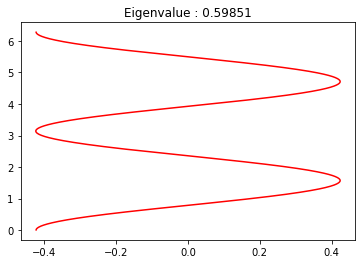

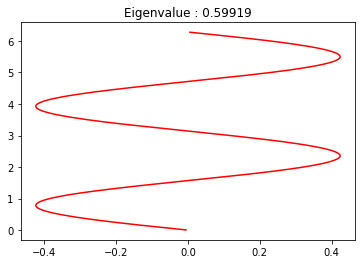

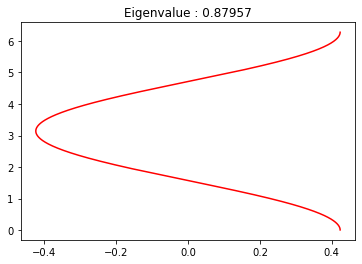

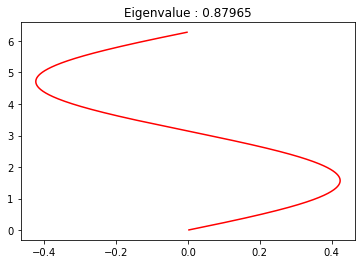

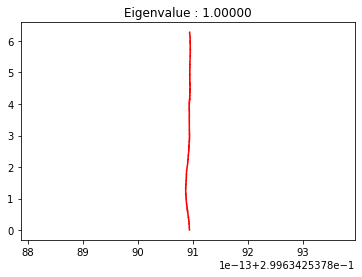

In [5]:
for eigval in range(eigvals.shape[0]):
    plt.title(f"Eigenvalue : {eigvals[eigval]:.5f}")
    plt.plot(eigvecs[:,eigval], T,  color="red")
    plt.show()

Let's visualize the results for the Fourier

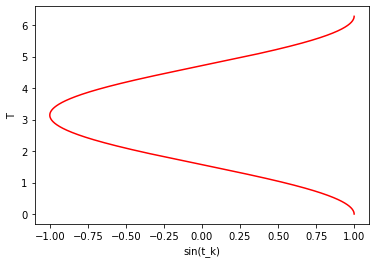

In [6]:
# sin values w.r.t to the T. 
plt.plot(values[:, 0], T, 'k', color='red')
plt.xlabel('sin(t_k)')
plt.ylabel('T');

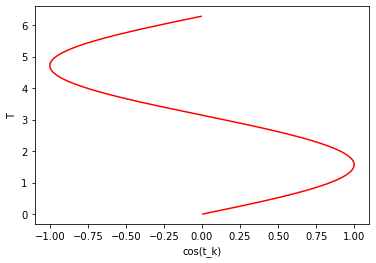

In [7]:
# cos values w.r.t to the T
plt.plot(values[:, 1], T, 'k', color='red')
plt.xlabel('cos(t_k)')
plt.ylabel('T');

## 2nd Part - Swiss Roll Manifold

First ten eigenfunctions of the Laplace-Beltrami operator defined through:

$$X = \{x_k \in \mathbb{R}^3\}_{k=1}^{N}\text{, } x_k = (u \cos(u), v, u \sin(u))$$

First, let's generate the swiss roll dataset and visualize it.

In [10]:
# By default, make_swiss_roll returns 3-dimensional dataset.
swiss_roll, t = make_swiss_roll(5000)

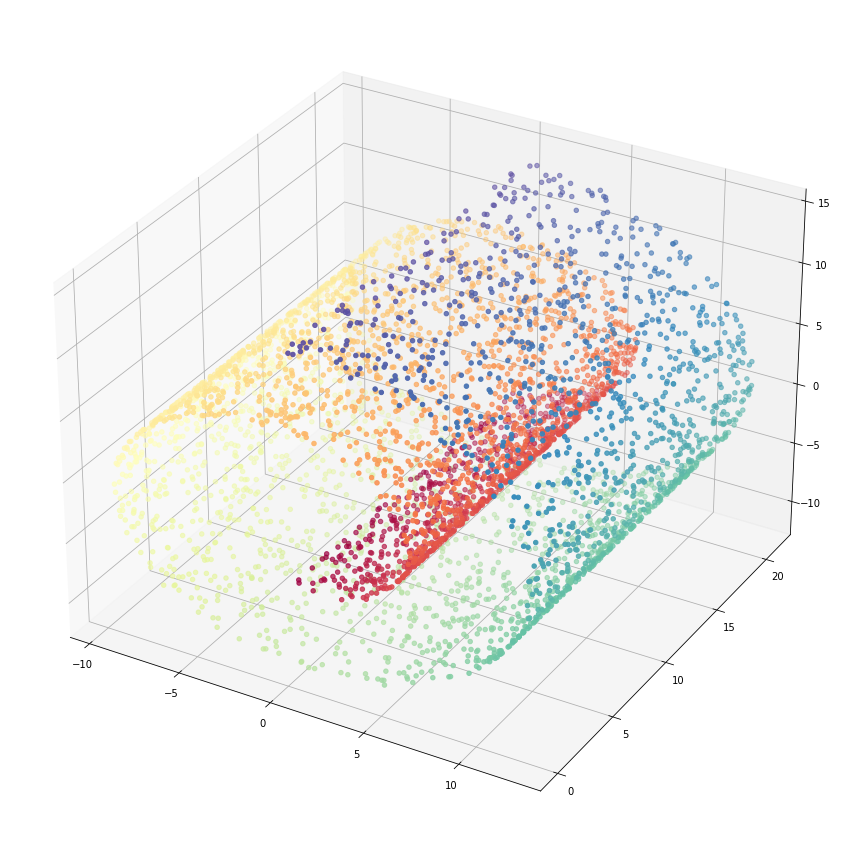

In [16]:
fig = plt.figure(figsize=(15, 30))
ax = fig.add_subplot(projection='3d')
ax.scatter(swiss_roll[:, 0], swiss_roll[:, 1], swiss_roll[:, 2], c=t, cmap=plt.cm.Spectral)

We then call the diffusion function to create the 10 eigenfunctions. The first non-constant eigenfunction ( $\phi_l$ != 1) is the penultimate value in the eigenvecs variable, so we select it and plot against the others. In the below plot, eigenvalues are in descending order i.e ( $\phi_0 > \phi_1 > \phi_2$)

In [12]:
eigenvals, eigenvecs = diffusion.diffusion_algorithm(swiss_roll, 10)

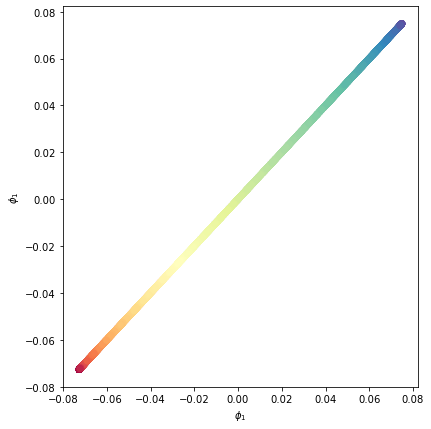

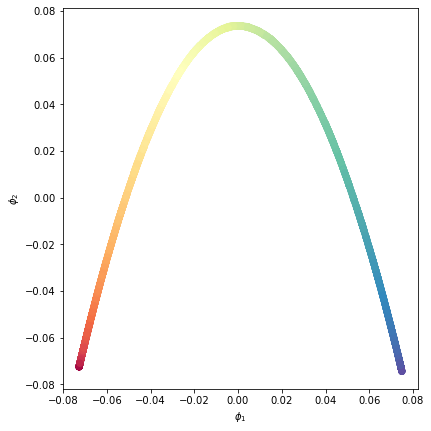

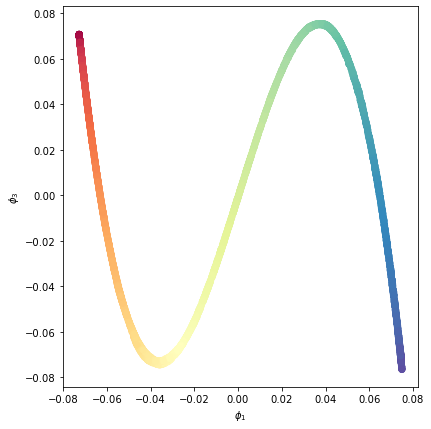

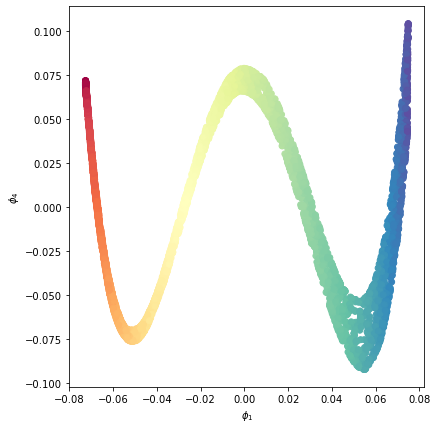

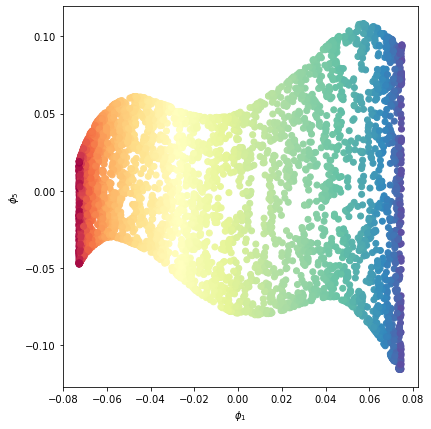

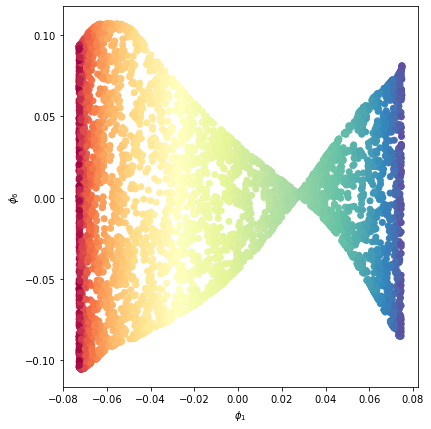

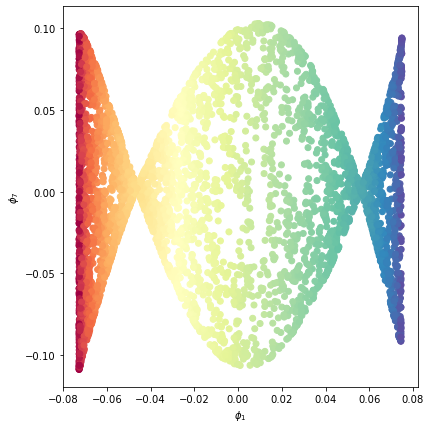

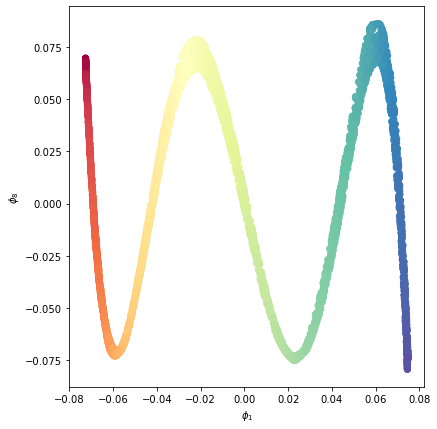

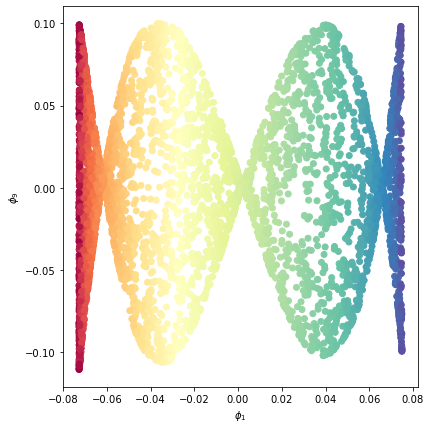

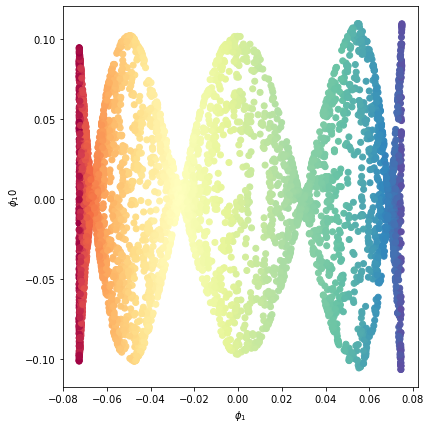

In [33]:
non_const_eigenfunc = eigenvecs[:, -2]

for i in range(1, len(eigenvals)):
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(121)
    ax.scatter(non_const_eigenfunc, eigenvecs[:,len(eigenvals) - 1 - i], c=t, cmap=plt.cm.Spectral)
    ax.set_xlabel(f"$\phi_1$")
    ax.set_ylabel(f'$\phi_{i}$');

Next, we compute the three principal components of this dataset

In [34]:
pca = PCA()
pca.pca(swiss_roll)

In [35]:
# Components and energy per components
pca.getComponents()

array([[ 0.59883452,  0.04602548,  0.79954917],
       [ 0.7741368 ,  0.22253862, -0.59261183],
       [ 0.20520581, -0.97383685, -0.09763379]])

In [36]:
pca.getEnergyPerComponent()

array([0.38928895, 0.3325813 , 0.27812976])

With two principal components

Total energy:  0.7218702427166784


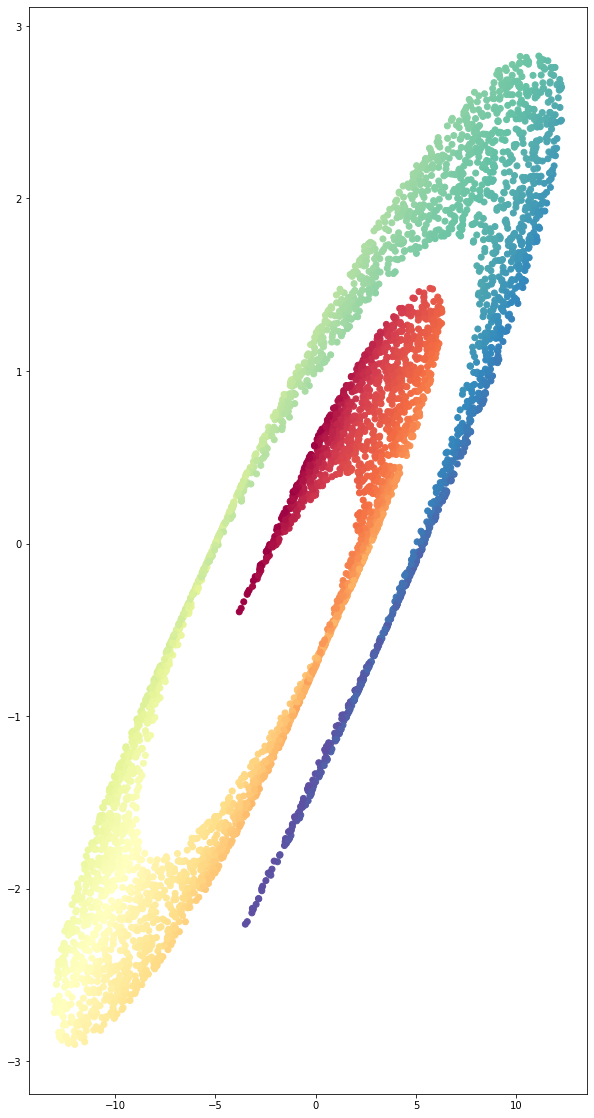

In [37]:
pca = PCA()
pca.pca(swiss_roll)

reconstructed, energy = pca.getReconstructedData(nComponents=2)
print("Total energy: ", energy)
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111)
ax.scatter(reconstructed[:,0],reconstructed[:,1], c=t, cmap=plt.cm.Spectral)

By having only 2 principal components, we capture ~70% of the total energy. For 1000 data points in the swiss roll dataset, we try exactly the same procedure, create the set, compute the 10 eigenfunctions and so on : 

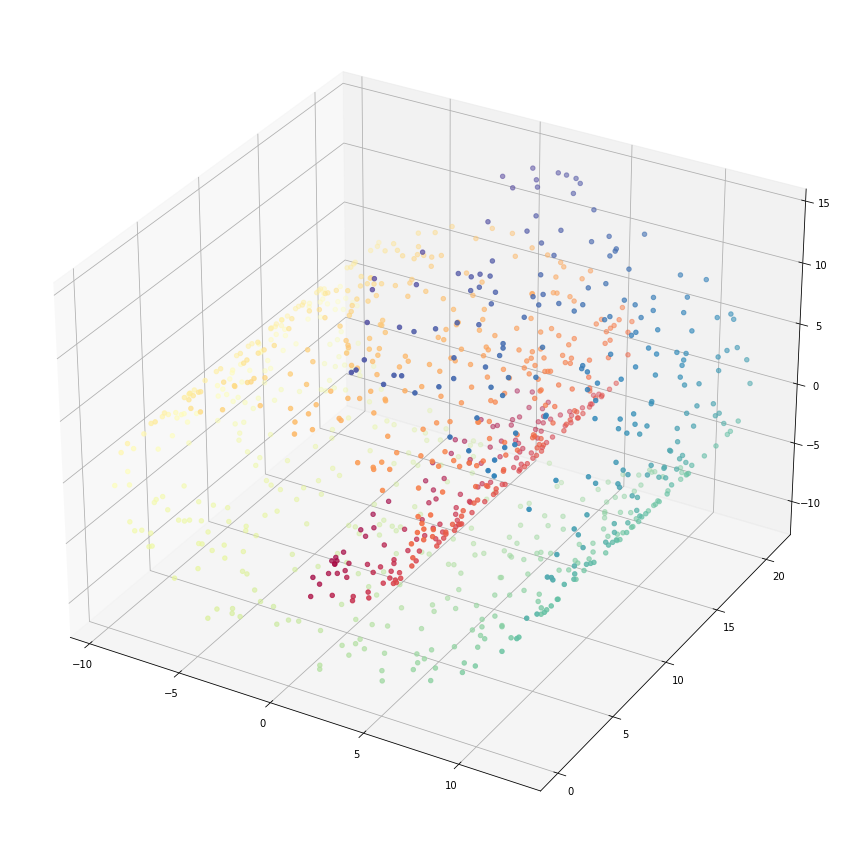

In [40]:
swiss_roll, t_color = make_swiss_roll(1000)

fig = plt.figure(figsize=(15, 30))

ax = fig.add_subplot(projection='3d')
ax.scatter(swiss_roll[:, 0], swiss_roll[:, 1], swiss_roll[:, 2], c=t_color, cmap=plt.cm.Spectral)

In [42]:
eigenvals, eigenvecs = diffusion.diffusion_algorithm(swiss_roll, 10)

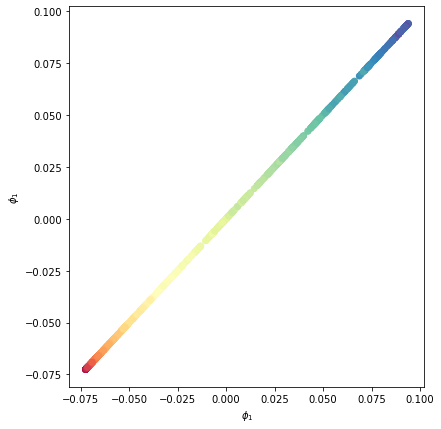

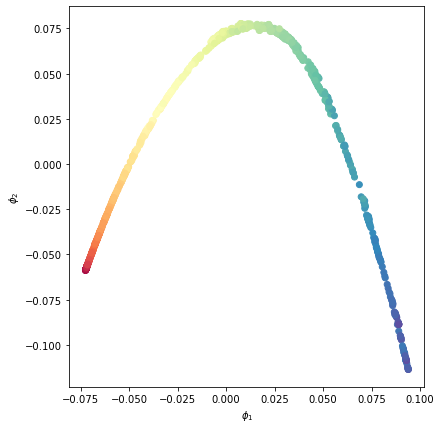

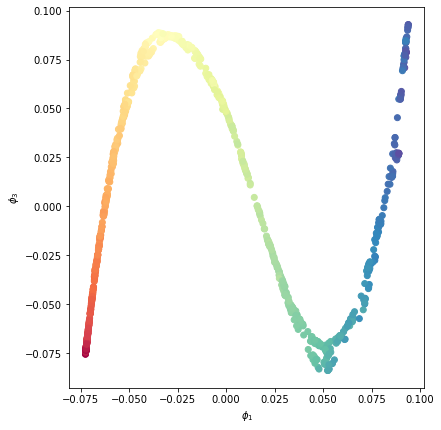

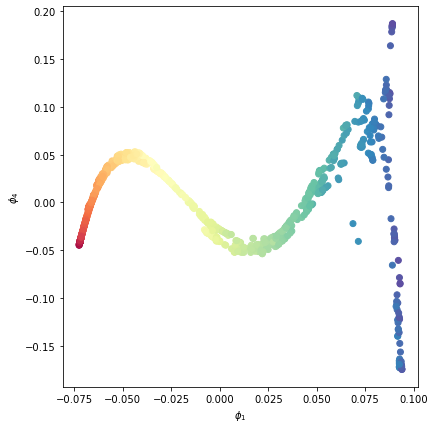

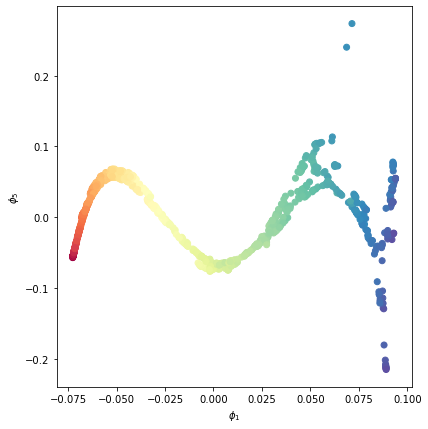

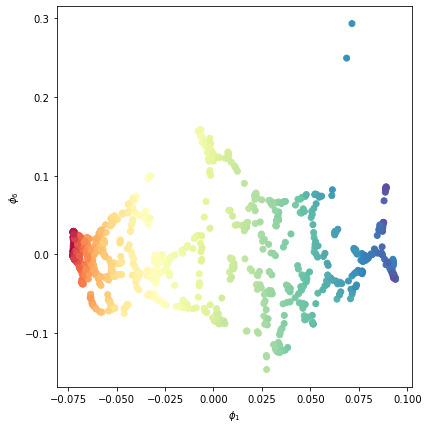

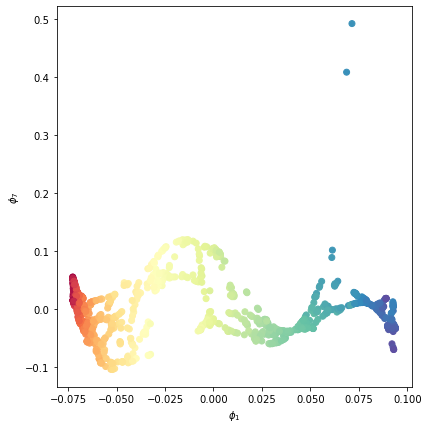

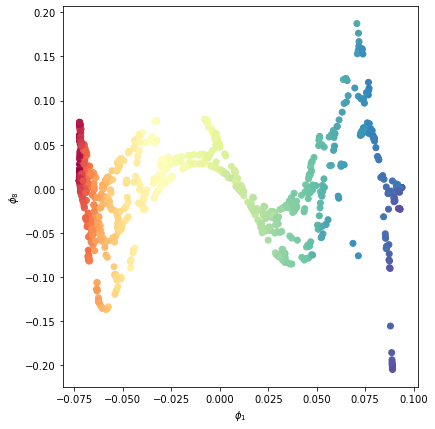

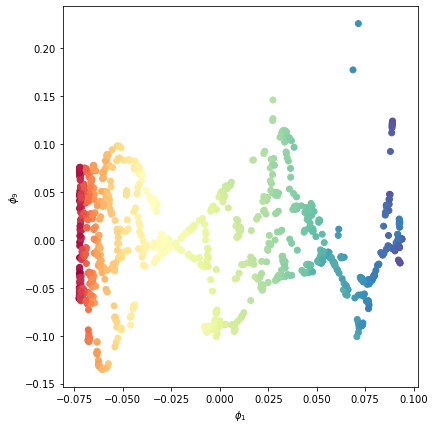

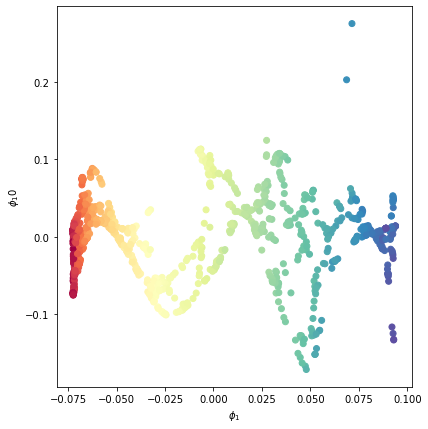

In [44]:
non_const_eigenfunc = eigenvecs[:, -2]

for i in range(1, len(eigenvals)):
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(121)
    ax.scatter(non_const_eigenfunc, eigenvecs[:,len(eigenvals) - 1 - i], c=t_color, cmap=plt.cm.Spectral)
    ax.set_xlabel(f"$\phi_1$")
    ax.set_ylabel(f'$\phi_{i}$');

Lastly, we apply PCA:

In [45]:
pca = PCA()
pca.pca(swiss_roll)

pca.getComponents()

array([[ 0.50611503,  0.08809407,  0.85795514],
       [-0.86024669, -0.01975462,  0.50949522],
       [-0.06183208,  0.99591626, -0.06578452]])

In [46]:
pca.getEnergyPerComponent()

array([0.4066197 , 0.32114381, 0.27223649])

Total energy:  0.7277635141202169


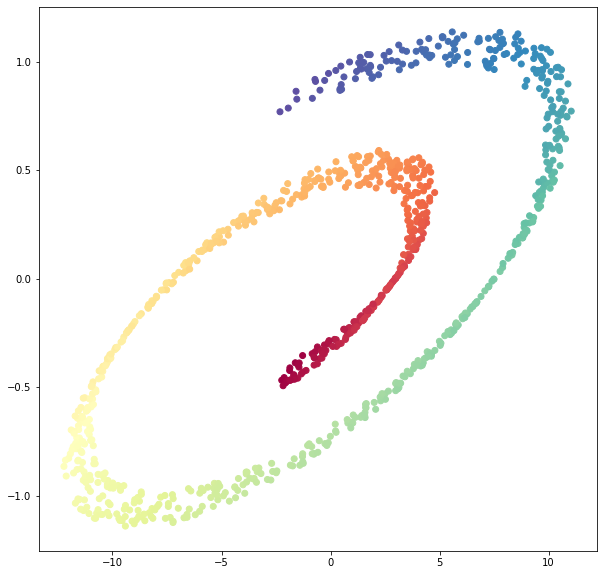

In [47]:
# 2 Components
pca = PCA()
pca.pca(swiss_roll)

reconstructed, energy = pca.getReconstructedData(nComponents=2)
print("Total energy: ", energy)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(reconstructed[:,0],reconstructed[:,1], c=t_color, cmap=plt.cm.Spectral)

## 3rd Part - Vadere File

Let's start by loading the file

In [48]:
data = Path('') / 'data'
DMAP_vadere_data = np.loadtxt(data / 'data_DMAP_PCA_vadere.txt', dtype = 'double')

First let's visualize the dataset with Diffusion maps by creating only two eigenfunction. L value is going to pass L+1 to the eigensolver(see ```diffusion_maps.py``` file)

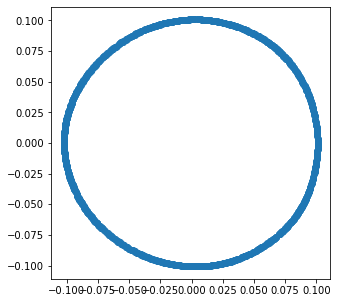

In [66]:
# Three eigenfunctions

L = 2
eigenvalue, eigenvector = diffusion.diffusion_algorithm(DMAP_vadere_data, L)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.scatter(eigenvector[:,0],eigenvector[:,1])

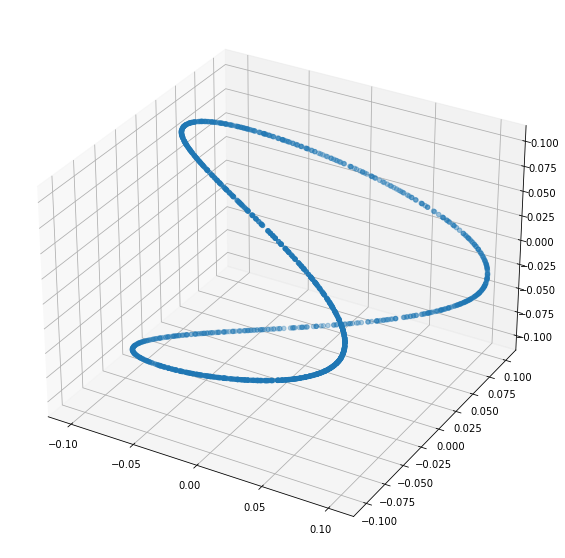

In [67]:
# Four eigenfunctions
L = 3
eigenvalue, eigenvector = diffusion.diffusion_algorithm(DMAP_vadere_data, L)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(eigenvector[:, 0], eigenvector[:, 1], eigenvector[:, 2])

So, after 4 eigenfunctions, we begin to have intersections between the curves.